<a href="https://github.com/sashnat/pandas-practice/blob/master/exercise_1/exercise_1.ipynb"> ссылка </a> 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import os

In [2]:
from openpyxl import load_workbook

In [3]:
directory = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1'
files = os.listdir(directory)
for file in files:
    print(file)

.ipynb_checkpoints
exercise_777.ipynb
exercise_888.ipynb
linear_regression_df.xlsx
linear_regression_df0.xlsx
linear_regression_df1.xlsx
linear_regression_df2.xlsx
linear_regression_d_f.xlsx


In [4]:
print(files)

['.ipynb_checkpoints', 'exercise_777.ipynb', 'exercise_888.ipynb', 'linear_regression_df.xlsx', 'linear_regression_df0.xlsx', 'linear_regression_df1.xlsx', 'linear_regression_df2.xlsx', 'linear_regression_d_f.xlsx']


In [5]:
dfiles = pd.DataFrame({ 'A' : files })

In [6]:
dfiles.head(100)

,A
0,.ipynb_checkpoints
1,exercise_777.ipynb
2,exercise_888.ipynb
3,linear_regression_df.xlsx
4,linear_regression_df0.xlsx
5,linear_regression_df1.xlsx
6,linear_regression_df2.xlsx
7,linear_regression_d_f.xlsx


In [7]:

from sklearn import linear_model
df = pd.read_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx')
df.columns = ['X', 'Y', 'z']
df.head(10)

,X,Y,z
0,108,392.5,1
1,19,46.2,2
2,13,200.0,3
3,124,422.2,4
4,40,119.4,5
5,55,88.0,6
6,70,300.0,7
7,100,400.0,8


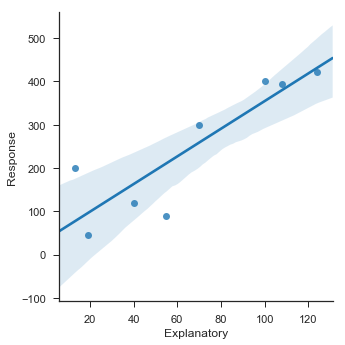

In [8]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

# - Some manipulations made with the data as a dictionary -

In [11]:
print(df['X'])
df1 = pd.DataFrame({ 'A' : 1.,
                     'B' : (df['Y']) + 10,
                     'C' : df['z'], 
                     'D' : df['X'] })
print (df1)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C    D
0  1.0  402.5  1  108
1  1.0   56.2  2   19
2  1.0  210.0  3   13
3  1.0  432.2  4  124
4  1.0  129.4  5   40
5  1.0   98.0  6   55
6  1.0  310.0  7   70
7  1.0  410.0  8  100


In [12]:
print(df['X'])

'''
l =[]
print(d)
for i in df['X']:
    i = str(i) + "_01"
    l.append(i)'''
df['X'] = [str(i) + "_01" for i in df['X']]

df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : df['Y'] + 10,
                     'C' : df['z'],
                     'D' : df['X'] })
print (df3)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C       D
0  1.0  402.5  1  108_01
1  1.0   56.2  2   19_01
2  1.0  210.0  3   13_01
3  1.0  432.2  4  124_01
4  1.0  129.4  5   40_01
5  1.0   98.0  6   55_01
6  1.0  310.0  7   70_01
7  1.0  410.0  8  100_01


# - File writing -

In [13]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
file = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df1.xlsx'
dfile = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df0.xlsx'
writer = pd.ExcelWriter(file, engine='xlsxwriter')
dwriter = pd.ExcelWriter(dfile, engine='xlsxwriter')
# Write each dataframe to a different worksheet.
df3.to_excel(writer, sheet_name='Sheet2')
dfiles.to_excel(dwriter, sheet_name='Sheet2')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
dwriter.save()



# - Appending data into the existing sheet -

In [14]:
file2 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx'
df5 = pd.DataFrame({ 'X' : 2.,
                     'Y' : (df['Y']) + 1000 })
df5.shape[0]   ## Gives no. of rows/records  or len(df) or len(df.index)
df.shape[1]   ## Gives no. of columns
curr_count = df5.shape[0]
writer = pd.ExcelWriter(file2, engine='openpyxl')

df3.to_excel(writer, index=False)    

df5.to_excel(writer, startrow=curr_count + 1, index=False)

writer.save()
df3.head(10)


,A,B,C,D
0,1.0,402.5,1,108_01
1,1.0,56.2,2,19_01
2,1.0,210.0,3,13_01
3,1.0,432.2,4,124_01
4,1.0,129.4,5,40_01
5,1.0,98.0,6,55_01
6,1.0,310.0,7,70_01
7,1.0,410.0,8,100_01


In [15]:
df5.head(10)

,X,Y
0,2.0,1392.5
1,2.0,1046.2
2,2.0,1200.0
3,2.0,1422.2
4,2.0,1119.4
5,2.0,1088.0
6,2.0,1300.0
7,2.0,1400.0


In [16]:
df100 = pd.read_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx')

In [17]:
df100.head(100)

,A,B,C,D
0,1,402.5,1.0,108_01
1,1,56.2,2.0,19_01
2,1,210,3.0,13_01
3,1,432.2,4.0,124_01
4,1,129.4,5.0,40_01
5,1,98,6.0,55_01
6,1,310,7.0,70_01
7,1,410,8.0,100_01
8,X,Y,NaN,NaN
9,2,1392.5,NaN,NaN


# - Appending data into a new sheet of the existing file -


In [18]:
file3 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx'

df4 = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
book = load_workbook(file3)
writer = pd.ExcelWriter(file3, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

# how do I insert a column at a specific column index in pandas?
idx = 0 # using (idx = 0) will insert at the beginning
new_col = [7, 8, 9, 10, 11, 12 , 0]  # can be a list, a Series, an array or a scalar   
df4.insert(loc=idx, column='A', value=new_col)
#
df4.to_excel(writer, sheet_name='New', index=None)
writer.save()
df4.head(10)

,A,Data
0,7,10
1,8,20
2,9,30
3,10,20
4,11,15
5,12,30
6,0,45


Займет 4 колонку в новом листе с шапкой W (значением df['Y'] + 30) и с колонками X,Y,z df(DataFrame) исходного файла.
Но без новых (своих) индесов 0 1 2 3 4 5 6 7 (в теле файла), так как в df.to_excel(writer) есть (index=None)

In [19]:
#file3 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx'
#df6 = pd.DataFrame({ 'W' : (df['Y']) + 30 })

book = load_workbook(file3)
writer = pd.ExcelWriter(file3, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

idx = 3 # займет 4 колонку в новом листе с шапкой W и значением df['Y'] + 30 с данными исходного файла
# Но без новых (своих) индесов 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) ---> index=None
new_col = df['Y'] + 30
df.insert(loc=idx, column='W', value=new_col)

df.to_excel(writer, sheet_name='New', index=None)  # Но без новых индесов 0 1 2 3 4 5 6 7, в новом листе
writer.save()
df.head(10)

,X,Y,z,W
0,108_01,392.5,1,422.5
1,19_01,46.2,2,76.2
2,13_01,200.0,3,230.0
3,124_01,422.2,4,452.2
4,40_01,119.4,5,149.4
5,55_01,88.0,6,118.0
6,70_01,300.0,7,330.0
7,100_01,400.0,8,430.0


Займет 3 колонку (если не считать "свои-новые" индексы) в новом листе с шапкой W1 (со значениями df['Y'] + 30) и с колонками W,X,Y,z df(DataFrame) исходного файла.
C новыми (своими) индесами 0 1 2 3 4 5 6 7 в теле файла, так как в df.to_excel(writer) нет (index=None)

In [20]:
file4 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx'
#df6 = pd.DataFrame({ 'W' : (df['Y']) + 30 })

book = load_workbook(file4)
writer = pd.ExcelWriter(file4, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

idx = 2 # займет 3 колонку (если не считать "свои-новые" индексы) в новом листе с шапкой W1 и значением df['Y'] + 30 с данными исходного файла
# C новыми (своими) индесами 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) нет ---> index=None
new_col1 = df['Y'] + 30
df.insert(loc=idx, column='W1', value=new_col1)
df.to_excel(writer)   # C новыми (со своими) индесами 0 1 2 3 4 5 6 7, в новом листе, и с колонкой W
writer.save()

In [21]:
df.head(10)

,X,Y,W1,z,W
0,108_01,392.5,422.5,1,422.5
1,19_01,46.2,76.2,2,76.2
2,13_01,200.0,230.0,3,230.0
3,124_01,422.2,452.2,4,452.2
4,40_01,119.4,149.4,5,149.4
5,55_01,88.0,118.0,6,118.0
6,70_01,300.0,330.0,7,330.0
7,100_01,400.0,430.0,8,430.0


# - Индексы -

In [22]:
print(df.index)

RangeIndex(start=0, stop=8, step=1)


In [23]:
df.iloc[5]   # строка под индексом "5"

X     55_01
Y        88
W1      118
z         6
W       118
Name: 5, dtype: object

In [24]:
df.index.name = 'N/N'

In [25]:
df.head(10)

,X,Y,W1,z,W
N/N,,,,,
0,108_01,392.5,422.5,1,422.5
1,19_01,46.2,76.2,2,76.2
2,13_01,200.0,230.0,3,230.0
3,124_01,422.2,452.2,4,452.2
4,40_01,119.4,149.4,5,149.4
5,55_01,88.0,118.0,6,118.0
6,70_01,300.0,330.0,7,330.0
7,100_01,400.0,430.0,8,430.0


#Замена индексов. Получение столбца из индексов 

In [26]:
df.index = [n for n in range(1, len(df['X']) +1)]

In [27]:
df.head(100)

,X,Y,W1,z,W
1,108_01,392.5,422.5,1,422.5
2,19_01,46.2,76.2,2,76.2
3,13_01,200.0,230.0,3,230.0
4,124_01,422.2,452.2,4,452.2
5,40_01,119.4,149.4,5,149.4
6,55_01,88.0,118.0,6,118.0
7,70_01,300.0,330.0,7,330.0
8,100_01,400.0,430.0,8,430.0


In [28]:
df.index.name = 'Новая нумерация строк' 

In [29]:
df.head(100)

,X,Y,W1,z,W
Новая нумерация строк,,,,,
1,108_01,392.5,422.5,1,422.5
2,19_01,46.2,76.2,2,76.2
3,13_01,200.0,230.0,3,230.0
4,124_01,422.2,452.2,4,452.2
5,40_01,119.4,149.4,5,149.4
6,55_01,88.0,118.0,6,118.0
7,70_01,300.0,330.0,7,330.0
8,100_01,400.0,430.0,8,430.0


In [30]:
d_f = df.reset_index()#сброс индексов. 
# pandas при операциях над DataFrame, возвращает новый объект DataFrame.
d_f.head(100)

,Новая нумерация строк,X,Y,W1,z,W
0,1,108_01,392.5,422.5,1,422.5
1,2,19_01,46.2,76.2,2,76.2
2,3,13_01,200.0,230.0,3,230.0
3,4,124_01,422.2,452.2,4,452.2
4,5,40_01,119.4,149.4,5,149.4
5,6,55_01,88.0,118.0,6,118.0
6,7,70_01,300.0,330.0,7,330.0
7,8,100_01,400.0,430.0,8,430.0


In [31]:
df.head(100)

,X,Y,W1,z,W
Новая нумерация строк,,,,,
1,108_01,392.5,422.5,1,422.5
2,19_01,46.2,76.2,2,76.2
3,13_01,200.0,230.0,3,230.0
4,124_01,422.2,452.2,4,452.2
5,40_01,119.4,149.4,5,149.4
6,55_01,88.0,118.0,6,118.0
7,70_01,300.0,330.0,7,330.0
8,100_01,400.0,430.0,8,430.0


In [32]:
d_f['new column'] = [str(i) + "_в новой колонке" for i in df['X']]
d_f.head(100)

,Новая нумерация строк,X,Y,W1,z,W,new column
0,1,108_01,392.5,422.5,1,422.5,108_01_в новой колонке
1,2,19_01,46.2,76.2,2,76.2,19_01_в новой колонке
2,3,13_01,200.0,230.0,3,230.0,13_01_в новой колонке
3,4,124_01,422.2,452.2,4,452.2,124_01_в новой колонке
4,5,40_01,119.4,149.4,5,149.4,40_01_в новой колонке
5,6,55_01,88.0,118.0,6,118.0,55_01_в новой колонке
6,7,70_01,300.0,330.0,7,330.0,70_01_в новой колонке
7,8,100_01,400.0,430.0,8,430.0,100_01_в новой колонке


In [33]:
d_f.to_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_d_f.xlsx')
# запишет новую инфориацию поверх существующей

In [34]:
dfiles.to_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_d_f.xlsx', sheet_name='Sheet100')
# запишет новую инфориацию поверх существующей в указанный лист, удалит остальные листы